In [1]:
!curl https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.csv?accessType=DOWNLOAD > waternyc.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006    0  1006    0     0   4383      0 --:--:-- --:--:-- --:--:--  4393


In [2]:
import os
print("PUIdata", os.getenv("PUIDATA"))

('PUIdata', '/nfshome/yc3763/PUIdata')


In [3]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

('PUIdata', '/nfshome/yc3763/PUIdata')


In [4]:
!mv waternyc.csv $PUIDATA

In [5]:
!ls $PUIDATA

budget.csv     nypdcom.csv	  revenue.csv	 school.csv
energynyc.csv  populationnyc.csv  schoolcom.csv  waternyc.csv


In [6]:
import pandas as pd
water = pd.read_csv("%s/waternyc.csv"%os.getenv("PUIDATA"))

In [7]:
water.head(8)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182
7,1986,7319246.0,1351.0,185


In [8]:
water.columns

Index([u'Year', u'New York City Population',
       u'NYC Consumption(Million gallons per day)',
       u'Per Capita(Gallons per person per day)'],
      dtype='object')

In [9]:
water_2c = water[['NYC Consumption(Million gallons per day)', 'New York City Population']]

In [10]:
water_2c.head(8)

,NYC Consumption(Million gallons per day),New York City Population
0,1512.0,7102100.0
1,1506.0,7071639.0
2,1309.0,7089241.0
3,1382.0,7109105.0
4,1424.0,7181224.0
5,1465.0,7234514.0
6,1326.0,7274054.0
7,1351.0,7319246.0


In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


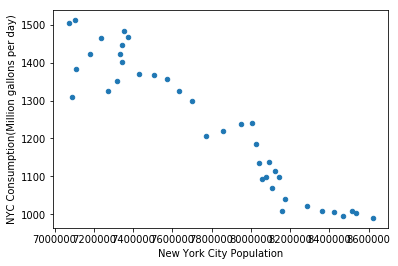

In [12]:
water_2c.plot(x="New York City Population", y="NYC Consumption(Million gallons per day)", kind='scatter')

Figure 1: New York City Population against NYC Consumption(Million gallons per day) reported by Water Consumption in The New York City. There is negative correlation between two factors, and there might be other reasons that cause the trend. 

In [13]:
url = "https://data.cityofnewyork.us/resource/waf7-5gvc.json"

In [14]:
df = pd.read_json(url)

In [16]:
df.head(9)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985
7,7319246.0,1351.0,185,1986
8,7342476.0,1447.0,197,1987


In [17]:
water_3c = df[['year', 'per_capita_gallons_per_person_per_day','nyc_consumption_million_gallons_per_day']]

In [18]:
water_3c.rename(columns = {'year':'year', 
               'per_capita_gallons_per_person_per_day':'Per Capita Gallons Per Person Per Day', 
               'nyc_consumption_million_gallons_per_day': 'NYC Consumption million gallons per day'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


(1980, 2020)

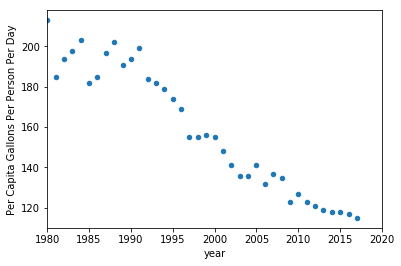

In [19]:
ax = water_3c.plot(x='year', y='Per Capita Gallons Per Person Per Day', kind ="scatter");
ax.set_ylabel("Per Capita Gallons Per Person Per Day");ax.set_xlim(1980,2020)

Figure 2:  New York City water consumption per capita gallons per person per day against year reported by Water Consumption in The New York City. There is negative correlation between two factors. Water consumption decreased from 1980 to 2018. 